# 第10章 多元线性回归

### 代码框10-1 多元线性回归

In [1]:
#回归模型拟合
from statsmodels.formula.api import ols
import pandas as pd
example10_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_1.csv', encoding='gbk')
model = ols('y~x1+x2+x3+x4+x5', data=example10_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     21.84
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           2.84e-07
Time:                        17:13:29   Log-Likelihood:                -91.170
No. Observations:                  25   AIC:                             194.3
Df Residuals:                      19   BIC:                             201.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2605     10.468      0.407      0.6

In [2]:
#输出方差分析表
from statsmodels.stats.anova import anova_lm
anova_lm(model, typ=1)


,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,10508.907564,10508.907564,92.738890,9.624821e-09
x2,1.0,1347.093656,1347.093656,11.887817,2.695895e-03
x3,1.0,85.431729,85.431729,0.753917,3.960742e-01
x4,1.0,40.485178,40.485178,0.357273,5.570824e-01
x5,1.0,392.537457,392.537457,3.464060,7.826181e-02
Residual,19.0,2153.026017,113.317159,NaN,NaN


### 代码框10-2 绘制残差图诊断模型

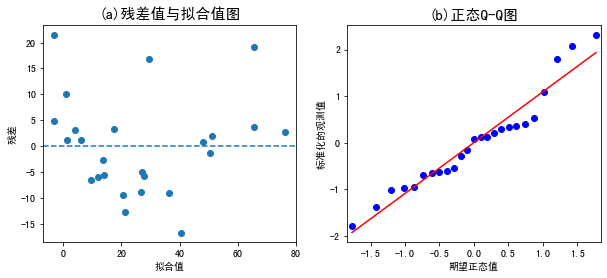

In [4]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
examle10_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_1.csv', encoding='gbk')
model = ols('y~x1+x2+x3+x4+x5', data=example10_1).fit()
x=model.fittedvalues; y=model.resid
plt.subplots(1,2,figsize=(10,4))
plt.subplot(121)
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('拟合值')
plt.ylabel('残差')
plt.title('(a)残差值与拟合值图',fontsize=15)
plt.axhline(0, ls='--')
ax2= plt.subplot(122)
pplot = sm.ProbPlot(model.resid, fit=True)
pplot.qqplot(line='r', ax=ax2, xlabel='期望正态值', ylabel='标准化的观测值')
ax2.set_title('(b)正态Q-Q图', fontsize=15)
plt.show()

### 代码框10-3 自变量之间的相关系数及其检验

In [5]:
#计算相关系数矩阵
import pandas as pd
example10_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_1.csv', encoding='gbk')
corr = example10_1.iloc[:,2:].corr()
corr

,x1,x2,x3,x4,x5
x1,1.000000,0.738110,0.883217,-0.623146,-0.277501
x2,0.738110,1.000000,0.553441,-0.538228,-0.323101
x3,0.883217,0.553441,1.000000,-0.522543,-0.290963
x4,-0.623146,-0.538228,-0.522543,1.000000,0.095279
x5,-0.277501,-0.323101,-0.290963,0.095279,1.000000


In [6]:
#相关系数的显著性检验
from scipy.stats import pearsonr
col = ['x1','x2','x3','x4','x5']
df_pvalue = pd.DataFrame(index=col, columns=col)
for i in range(2,7):
    for j in range(2,7):
        cor, p_value=pearsonr(example10_1.iloc[:,i], example10_1.iloc[:,j])
        df_pvalue.iloc[i-2, j-2] = p_value
df_pvalue

,x1,x2,x3,x4,x5
x1,0,2.53486e-05,5.03191e-09,0.000876306,0.179264
x2,2.53486e-05,0,0.00410658,0.00551311,0.115166
x3,5.03191e-09,0.00410658,0,0.00736697,0.15822
x4,0.000876306,0.00551311,0.00736697,0,0.65052
x5,0.179264,0.115166,0.15822,0.65052,0


### 代码框10-4 计算容忍度和VIF

In [2]:
import pandas as pd
from statsmodels.formula.api import ols
def vif(df_exog, exog_name):
    exog_use = list(df_exog.columns)
    exog_use.remove(exog_name)
    model = ols(f"{exog_name}~{'+'.join(list(exog_use))}", data=df_exog).fit()
    rsq =model.rsquared
    return 1./(1. -rsq)
example10_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_1.csv', encoding='gbk')
df_vif =pd.DataFrame()
for x in ['x1','x2','x3','x4','x5']:
    vif_i = vif(example10_1.iloc[:,2:], x)
    df_vif.loc['VIF', x] = vif_i
df_vif.loc['tolerance'] = 1/df_vif.loc['VIF']
df_vif

,x1,x2,x3,x4,x5
VIF,8.233159,2.629940,5.184365,1.702361,1.174053
tolerance,0.121460,0.380237,0.192888,0.587420,0.851750


### 代码框10-5 y与自变量x1、x2、x5回归模型

In [3]:
import pandas as pd
from statsmodels.formula.api import ols
example10_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_1.csv', encoding='gbk')
model2 = ols("y~x1+x2+x5", data=example10_1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     37.85
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           1.19e-08
Time:                        15:34:13   Log-Likelihood:                -91.816
No. Observations:                  25   AIC:                             191.6
Df Residuals:                      21   BIC:                             196.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6893      6.252     -0.270      0.7

In [5]:
#方差分析表
from statsmodels.stats.anova import anova_lm
anova_lm(model2, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,10508.907564,10508.907564,97.339177,2.452138e-09
x2,1.0,1347.093656,1347.093656,12.477509,1.975601e-03
x5,1.0,404.283704,404.283704,3.744694,6.655774e-02
Residual,21.0,2267.196677,107.961747,NaN,NaN


### 代码框10-6 含有3个自变量回归模型的诊断

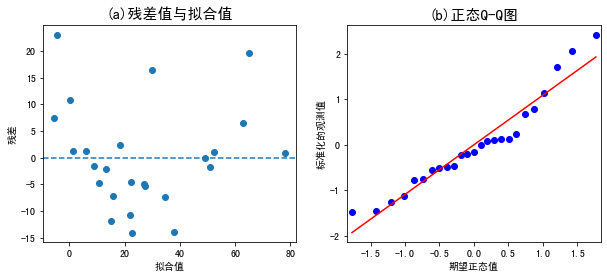

In [8]:
#绘制残差图诊断模型
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
example10_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_1.csv', encoding='gbk')
model2 = ols('y~x1+x2+x5', data = example10_1).fit()
x= model2.fittedvalues; y=model2.resid
plt.subplots(1,2,figsize=(10,4))
plt.subplot(121)
plt.scatter(model2.fittedvalues, model2.resid)
plt.xlabel('拟合值')
plt.ylabel('残差')
plt.title('(a)残差值与拟合值', fontsize=15)
plt.axhline(0, ls='--')
ax2 = plt.subplot(122)
pplot = sm.ProbPlot(model2.resid, fit=True)
pplot.qqplot(line='r', ax=ax2, xlabel='期望正态值', ylabel='标准化的观测值')
ax2.set_title('(b)正态Q-Q图', fontsize=15)
plt.show()

### 代码框10-7 计算例10-1的标准化回归系数

In [9]:
import pandas as pd
from statsmodels.formula.api import ols
from scipy import stats
example10_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_1.csv', encoding='gbk')
example10_1.drop(['餐馆编号'], axis=1, inplace=True)
z = stats.zscore(example10_1, ddof=1)
df=pd.DataFrame(z,columns=['zy','zx1','zx2','zx3','zx4','zx5'])
modelz=ols('zy~zx1+zx2+zx3+zx4+zx5',df).fit()
print(modelz.summary())

                            OLS Regression Results                            
Dep. Variable:                     zy   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     21.84
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           2.84e-07
Time:                        16:01:29   Log-Likelihood:                -11.099
No. Observations:                  25   AIC:                             34.20
Df Residuals:                      19   BIC:                             41.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.714e-17      0.087  -1.12e-15      1.0

### 代码框10-8 比较逐步回归模型与含所有5个自变量的回归模型

In [10]:
#用anova比较
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
example10_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_1.csv', encoding='gbk')
model1 = ols('y~x1+x2+x3+x4+x5', data=example10_1).fit()
model2 = ols('y~x1+x2+x5', data=example10_1).fit()
anova_lm(model2, model1, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,21.0,2267.196677,0.0,NaN,NaN,NaN
1,19.0,2153.026017,2.0,114.17066,0.503766,0.612098


In [11]:
#用AIC比较
pd.DataFrame([model2.aic, model1.aic], ['model2','model1'], columns=['AIC'])

,AIC
model2,191.632516
model1,194.340771


### 代码框10-9 用回归方程进行预测

In [6]:
#计算点预测值，置信区间和预测区间
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import summary_table
example10_1 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_1.csv', encoding='gbk')
model = ols('y~x1+x2+x5', data=example10_1).fit()
conf_level=0.95
st,_,_ = summary_table(model, alpha=1-conf_level)
columns = [x+''+y for (x,y) in zip(st.data[0], st.data[1])]
df_res = pd.DataFrame()                  #将simpletable转化为DataFrame
for i in range(len(st.data)-2):
    df_res = df_res.append(pd.DataFrame(st.data[i+2], index=columns).T)
df_res.reset_index(drop=True, inplace=True)
#print(df_res)
df_res.drop(columns=['Std ErrorMean Predict', 'StudentResidual','Std ErrorResidual'], inplace=True)
round(df_res, 2)

,Obs,Dep VarPopulation,PredictedValue,Mean ci95% low,Mean ci95% upp,Predict ci95% low,Predict ci95% upp,Residual,Cook'sD
0,1.0,53.2,52.19,45.46,58.92,29.56,74.82,1.01,0.00
1,2.0,18.5,-4.50,-11.97,2.97,-27.36,18.36,23.00,0.19
2,3.0,11.3,21.96,15.69,28.24,-0.54,44.46,-10.66,0.03
3,4.0,84.7,65.11,49.30,80.93,38.34,91.89,19.59,2.21
4,5.0,7.3,6.13,-2.28,14.54,-17.06,29.32,1.17,0.00
5,6.0,17.9,22.41,14.58,30.24,-0.57,45.39,-4.51,0.01
6,7.0,2.5,1.28,-6.11,8.67,-21.56,24.12,1.22,0.00
7,8.0,27.3,34.72,28.40,41.04,12.21,57.23,-7.42,0.01
8,9.0,5.9,10.63,4.90,16.35,-11.73,32.98,-4.73,0.00
9,10.0,23.9,37.84,32.19,43.49,15.51,60.18,-13.94,0.04


In [8]:
#求x1=50,x2=100,x5=10时y的点预测值
model.predict(exog=dict(x1=50,x2=100,x5=10))

0    17.886847
dtype: float64

### 代码框10-10 日均营业额与用餐平均支出的一元回归

In [10]:
#日均营业额与用餐支出的一元回归模型
from statsmodels.formula.api import ols
import pandas as pd
example10_7 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_7.csv', encoding='gbk')
models = ols('日均营业额~用餐平均支出', data=example10_7).fit()
print(models.summary())

                            OLS Regression Results                            
Dep. Variable:                  日均营业额   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     52.23
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           2.34e-07
Time:                        15:04:29   Log-Likelihood:                -100.22
No. Observations:                  25   AIC:                             204.4
Df Residuals:                      23   BIC:                             206.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7502      5.251     -1.095      0.2

In [11]:
#方差分析表
from statsmodels.stats.anova import anova_lm
anova_lm(models, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
用餐平均支出,1.0,10085.879366,10085.879366,52.227825,2.342873e-07
Residual,23.0,4441.602234,193.113141,NaN,NaN


### 代码框10-11 包含哑变量的二元回归

In [12]:
#引入哑变量交通方便程度x2,x2=1--方便；x2=0--不方便
#日均营业额与用餐平均支出和交通方便程度的二元回归
from statsmodels.formula.api import ols
import pandas as pd
example10_7 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_7.csv', encoding='gbk')
modeld = ols('日均营业额~用餐平均支出+交通方便程度', data=example10_7).fit()
print(modeld.summary())

                            OLS Regression Results                            
Dep. Variable:                  日均营业额   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     38.02
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           7.27e-08
Time:                        15:10:51   Log-Likelihood:                -96.356
No. Observations:                  25   AIC:                             198.7
Df Residuals:                      22   BIC:                             202.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.4541      4.698     -1.799   

In [13]:
#方差分析表
from statsmodels.stats.anova import anova_lm
anova_lm(modeld, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
交通方便程度,1.0,4193.122184,4193.122184,28.296158,2.439564e-05
用餐平均支出,1.0,7074.245908,7074.245908,47.738648,6.145195e-07
Residual,22.0,3260.113508,148.186978,NaN,NaN


### 代码框10-12 交通方便与不方便时的两个回归方程图像

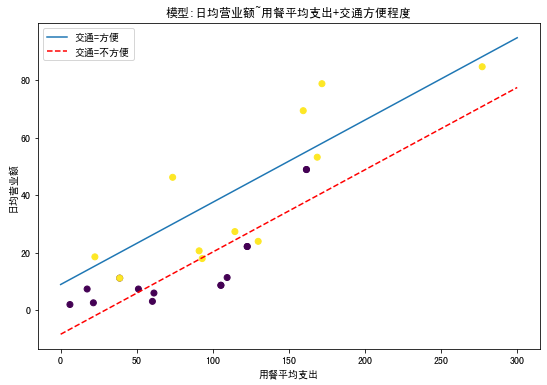

In [16]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
example10_7 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_7.csv', encoding='gbk')
example10_7['交通方便程度'] = example10_7['交通方便程度'].replace({'方便':1,'不方便':0})
modeld = ols('日均营业额~用餐平均支出+交通方便程度', data=example10_7).fit()
plt.figure(figsize=(9,6))
plt.scatter(example10_7['用餐平均支出'],example10_7['日均营业额'], c=example10_7['交通方便程度'])
slope =modeld.params['用餐平均支出']
intercept1 = modeld.params['Intercept']
intercept2 = models.params['Intercept'] + modeld.params['交通方便程度']
x = np.array([0,300])
plt.plot(x,(intercept2+slope*x))
plt.plot(x,(intercept1+slope*x),'r--')
plt.legend(['交通=方便', '交通=不方便'])
plt.xlabel('用餐平均支出')
plt.ylabel('日均营业额')
plt.title('模型:日均营业额~用餐平均支出+交通方便程度')
plt.show()

### 代码框10-13 哑变量回归预测

In [17]:
from statsmodels.formula.api import ols
import pandas as pd
example10_7 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_7.csv', encoding='gbk')
modeld = ols('日均营业额~用餐平均支出+交通方便程度', data=example10_7).fit()
df_res =example10_7.copy()
df_res['点预测值']=modeld.fittedvalues
df_res['残差']=modeld.resid
round(df_res, 4)

,餐馆编号,日均营业额,用餐平均支出,交通方便程度,点预测值,残差
0,1,53.2,168.6,方便,54.4561,-1.2561
1,2,18.5,22.5,方便,12.6111,5.8889
2,3,11.3,109.4,不方便,22.8795,-11.5795
3,4,84.7,277.0,方便,85.5033,-0.8033
4,5,7.3,17.4,不方便,-3.4705,10.7705
5,6,17.9,93.0,方便,32.8032,-14.9032
6,7,2.5,21.5,不方便,-2.2962,4.7962
7,8,27.3,114.5,方便,38.9611,-11.6611
8,9,5.9,61.3,不方便,9.1030,-3.2030
9,10,23.9,129.8,方便,43.3433,-19.4433


### 代码框10-14 仅有“用餐平均支出”一个变量与增加交通方便程度哑变量的回归模型比较

In [20]:
#用anova比较
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
example10_7 = pd.read_csv('F:\JupyterData\Statistics_Pythoncoding\data\chap10\example10_7.csv', encoding='gbk')
models = ols('日均营业额~用餐平均支出', data=example10_7).fit()
modeld = ols('日均营业额~用餐平均支出+交通方便程度', data=example10_7).fit()
anova_lm(models, modeld, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,23.0,4441.602234,0.0,NaN,NaN,NaN
1,22.0,3260.113508,1.0,1181.488726,7.972959,0.009889


In [21]:
#AIC比较
pd.DataFrame([models.aic, modeld.aic], ['models','model'], columns=['AIC'])

,AIC
models,204.444292
model,198.712963
